In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.8MB 28.2MB/s 
     |████████████████████████████████| 450kB 43.1MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist # importa o mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # divide em treino e teste

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

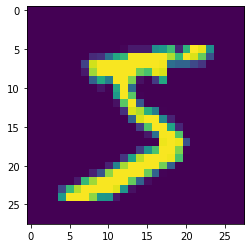

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [0]:
#x_train = tf.keras.utils.normalize(x_train, axis=1) # normaliza treino
#x_test = tf.keras.utils.normalize(x_test, axis=1) # normaliza teste

In [0]:
model = tf.keras.models.Sequential() # modelo sequencial (feed-foward)

In [0]:
model.add(tf.keras.layers.Flatten()) # transforma cada matriz de imagens 28x28 em uma dimensão só e adiciona como primeira camada ao modelo

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # adiciona uma camada escondida, utilzando relu como funçãão de ativação e 128 neurons

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # segunda camada escondida

In [0]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # camada de saida

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.9196 - accuracy: 0.8691
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3923 - accuracy: 0.9184
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2815 - accuracy: 0.9354
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2017 - accuracy: 0.9492
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1557 - accuracy: 0.9584
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1359 - accuracy: 0.9627
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1232 - accuracy: 0.9661
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1125 - accuracy: 0.9689
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1036 - accuracy: 0.9711
Epoch 10/10
60

In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.1580 - accuracy: 0.9624
0.15795198907005834 0.9624


In [0]:
model.save('modelo_mnist.model') # salvar modelo  

INFO:tensorflow:Assets written to: modelo_mnist.model/assets


In [0]:
novo_modelo = tf.keras.models.load_model('modelo_mnist.model')

In [0]:
preds = novo_modelo.predict(x_test) # fazer previsões de probabilidade

In [0]:
import numpy as np

np.argmax(preds[0])

7

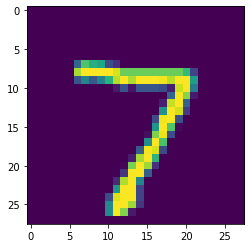

In [0]:
plt.imshow(x_test[0])